In [42]:
# Import the necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Loading the dataset
gr8_project = pd.read_csv("datasets/winequality-red.csv", header = 0)
gr8_project

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [44]:
gr8_project.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
gr8_project['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [56]:
# Train test split

from sklearn.model_selection import train_test_split
X = gr8_project.drop('quality', axis = 1)

y = gr8_project['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [57]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initializing the LogisticRegression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the datatest
y_pred = model.predict(X_test)

# Getting the score

LogisticRegression_score = model.score(X_test, y_test)
print("The accuracy is:", LogisticRegression_score)



The accuracy is: 0.60625


In [54]:
y_train.unique()

array([7, 8, 5, 6, 4, 3])

In [36]:
coefficient = model.coef_

In [85]:
coefficient_df = pd.DataFrame(coefficient, index = model.classes_, columns = X_train.columns)
coefficient_df.index.name = "quality"
coefficient_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,0.108662,0.047814,-0.001399,-0.117974,0.010206,0.068470,-0.025349,-0.007586,-0.021292,-0.014301,-0.274193
4,-0.216638,0.257724,-0.090816,0.226146,0.009100,-0.074989,0.014977,0.037795,0.191897,-0.065055,0.041020
5,0.228524,0.961999,-0.461900,-0.066535,0.117937,-0.025906,0.031717,0.474425,1.672060,-0.342484,-0.713056
6,0.089390,-0.427785,0.027305,-0.063529,-0.045297,0.004009,0.011798,-0.097105,-0.327644,0.169918,0.226219
7,0.085033,-0.752602,0.471927,0.004572,-0.079832,0.026176,-0.005375,-0.351099,-1.301671,0.232901,0.472172
8,-0.294971,-0.087151,0.054884,0.017320,-0.012114,0.002241,-0.027767,-0.056431,-0.213351,0.019020,0.247837


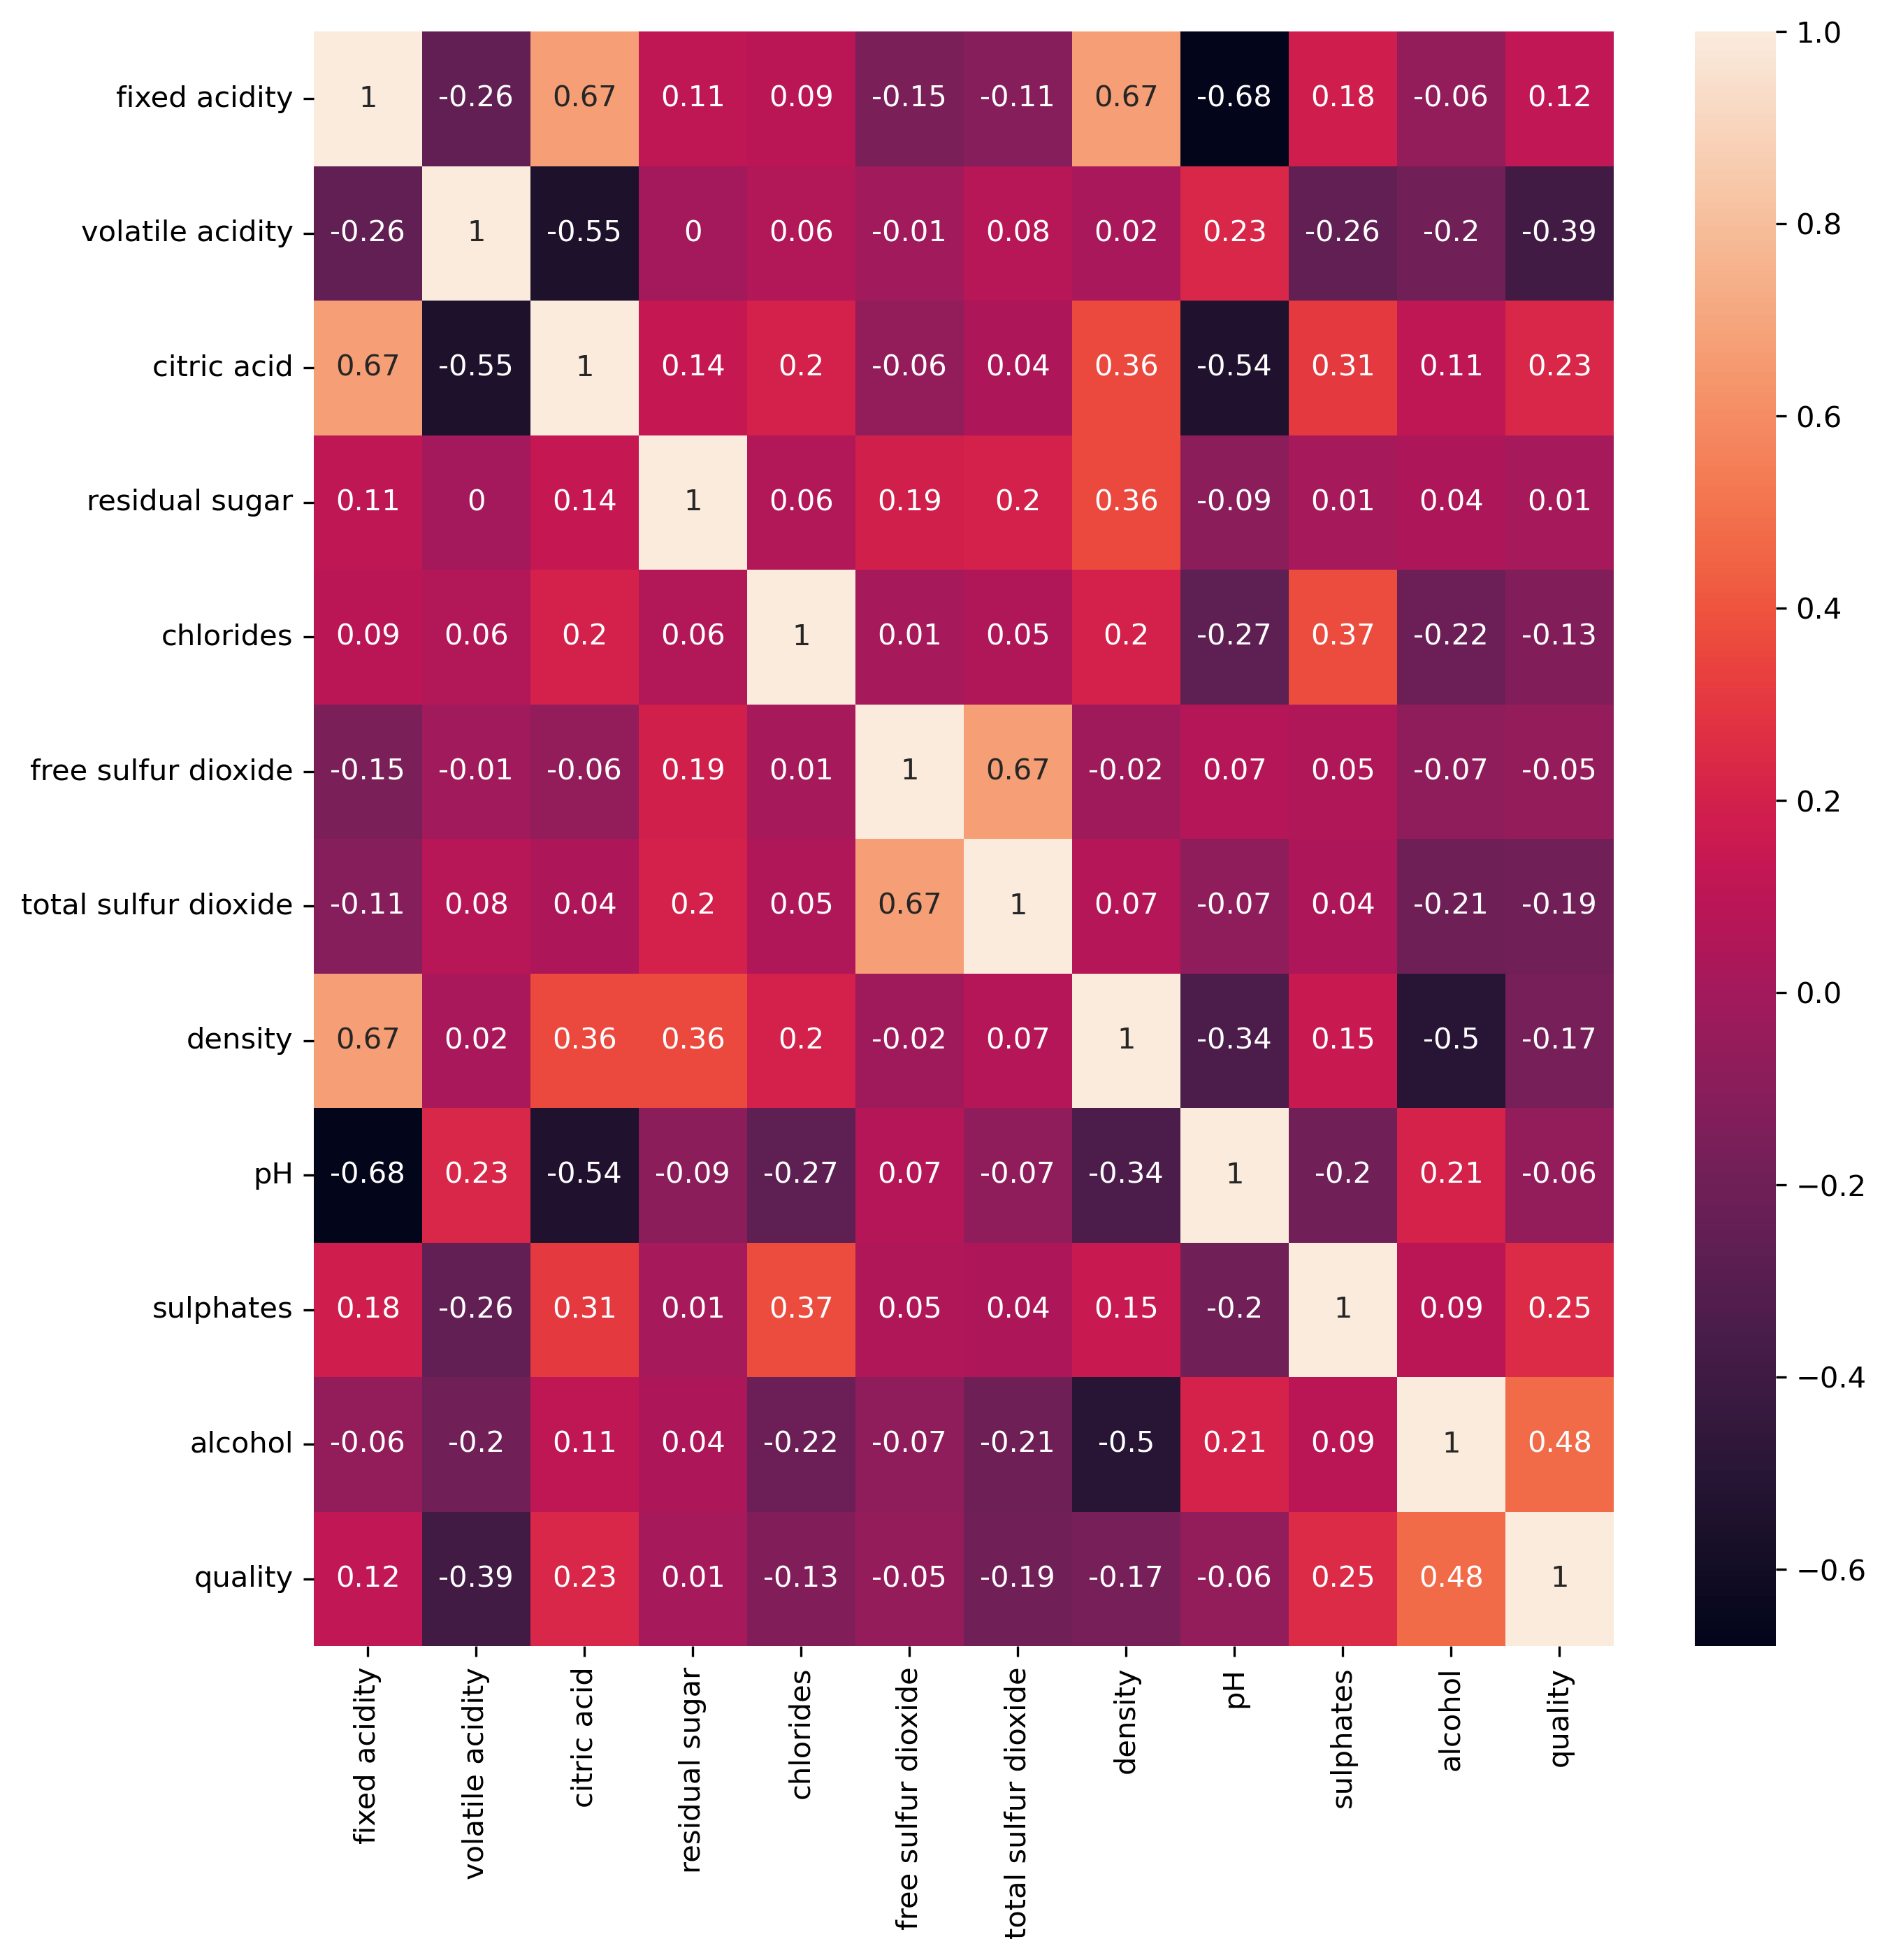

In [87]:
plt.figure(figsize=(10, 10),dpi=300)
correlation_matrix = gr8_project.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#plt.savefig('/Users/Ahmed/Documents/Dsan6700/heatmap.jpg',dpi=300)